In [ ]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown --id 1fViaZGFhhNq7nhrufdk3TO_A_4fnmpNP


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fViaZGFhhNq7nhrufdk3TO_A_4fnmpNP
To: /content/Data Samples.xlsx
100% 128k/128k [00:00<00:00, 37.2MB/s]


# **Import Dataset**


In [ ]:
df = pd.read_excel("Data Samples.xlsx")

FileNotFoundError: ignored

In [ ]:
df

,ID,x1,x2,x3,x4,x5
0,1,100.0,2154.0,2841.0,2827.25,326.0
1,2,121.0,2133.0,2824.0,2809.50,326.0
2,3,140.0,2134.0,2858.0,2845.00,326.0
3,4,150.0,2189.0,2854.0,2841.00,326.0
4,5,100.0,2128.0,2712.5,2700.00,326.0
...,...,...,...,...,...,...
2805,2806,-190.0,2133.0,2375.5,2376.50,72252.0
2806,2807,-185.0,2109.0,2321.5,2323.50,65981.0
2807,2808,-170.0,2105.0,2318.5,2320.00,57964.0
2808,2809,-175.0,2093.0,2346.5,2348.00,51333.0


# **Data Preprocessing**

#### **5 dòng đầu tiên của dataset**

In [ ]:
df.head()

NameError: ignored

#### **Lấy thông tin của các biến**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2810 non-null   int64  
 1   x1      2810 non-null   float64
 2   x2      2810 non-null   float64
 3   x3      2810 non-null   float64
 4   x4      2810 non-null   float64
 5   x5      2810 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 131.8 KB


#### **Lấy thông tin về các chiều của dataset**

In [ ]:
df.shape

(2810, 6)

*Dataset có 2810 dòng và 6 cột*


#### **Đếm số giá trị riêng biệt của từng cột**

In [ ]:
df.nunique()

ID    2810
x1     231
x2    1069
x3    1702
x4    1673
x5    2260
dtype: int64

#### **Kiểm tra giá trị khuyết** 

In [ ]:
df.isnull().sum()

ID    0
x1    0
x2    0
x3    0
x4    0
x5    0
dtype: int64

In [ ]:
df.isna().sum()

ID    0
x1    0
x2    0
x3    0
x4    0
x5    0
dtype: int64

*Không có giá trị rỗng hoặc giá trị NA*

#### **Thống kê mô tả các biến x1, x2, x3, x4, x5**

In [ ]:
df[['x1', 'x2', 'x3', 'x4', 'x5']].describe()

,x1,x2,x3,x4,x5
count,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000
mean,3.016233,1771.008630,1441.441650,1464.482073,48839.989758
std,114.975972,309.199417,396.200459,393.570851,47554.539722
min,-470.000000,1084.000000,866.500000,880.000000,0.000000
25%,-50.000000,1511.000000,1163.500000,1187.500000,282.250000
50%,-10.000000,1795.000000,1316.250000,1334.500000,45436.000000
75%,70.000000,2026.000000,1670.375000,1695.375000,89434.000000
max,321.000000,2490.000000,2858.000000,2845.000000,183611.000000


#### **Plot giá trị của từng biến với index là ID**

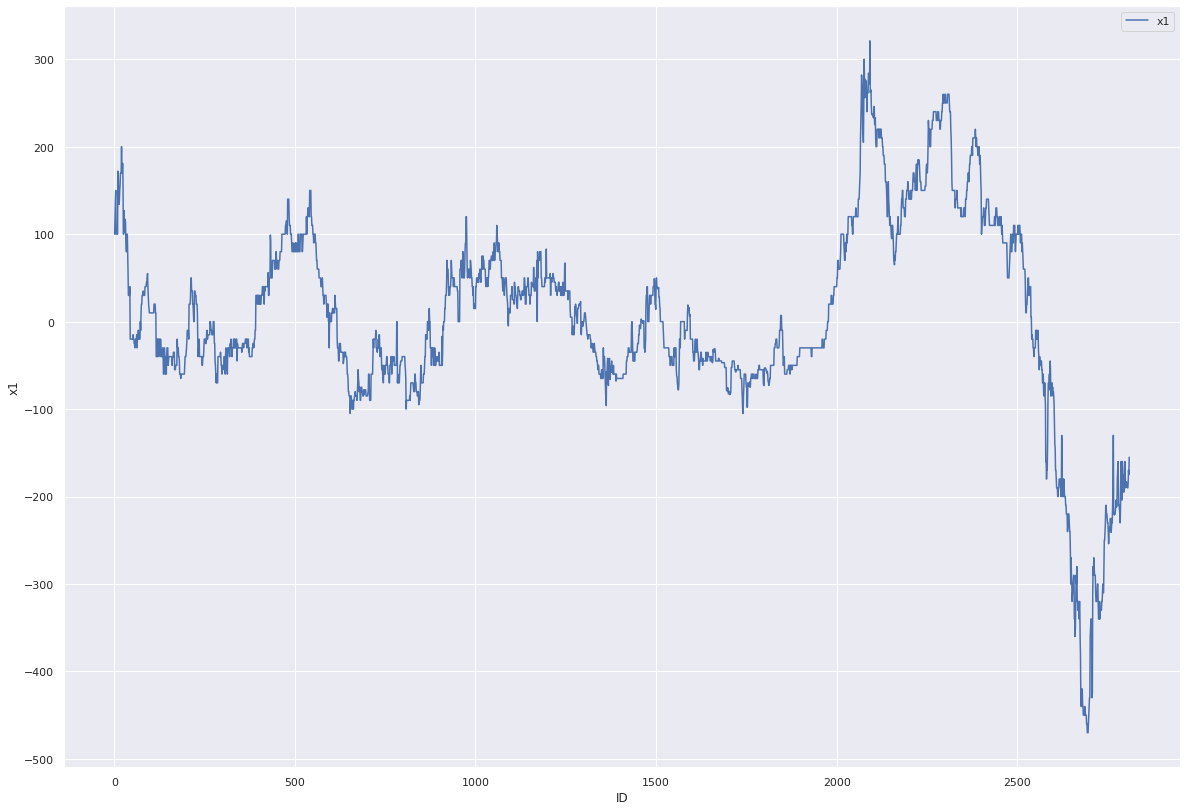

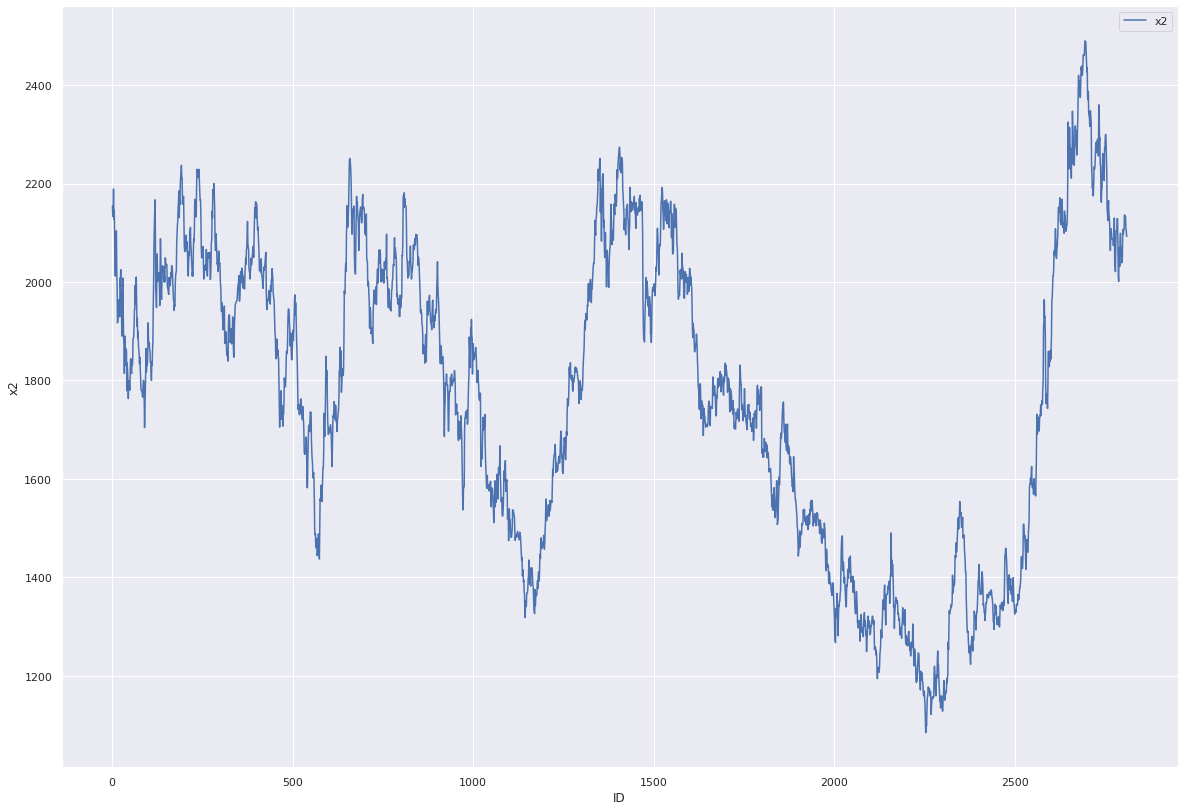

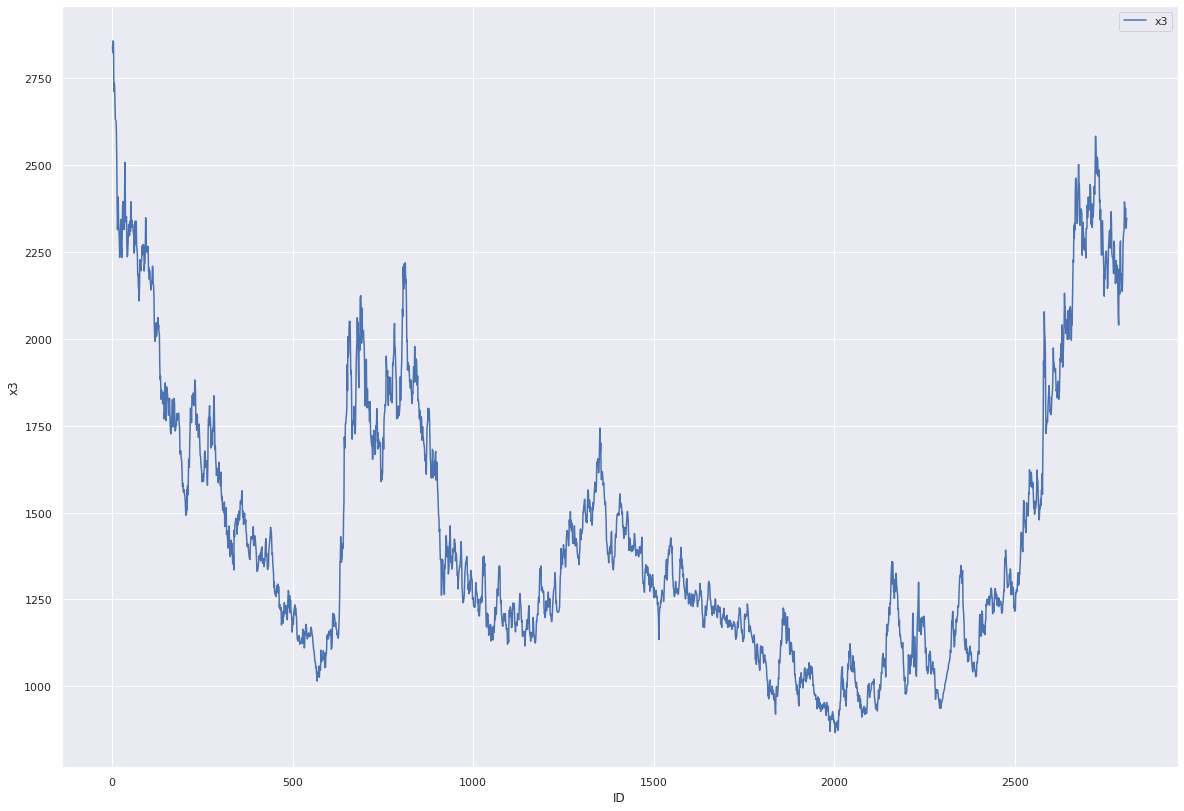

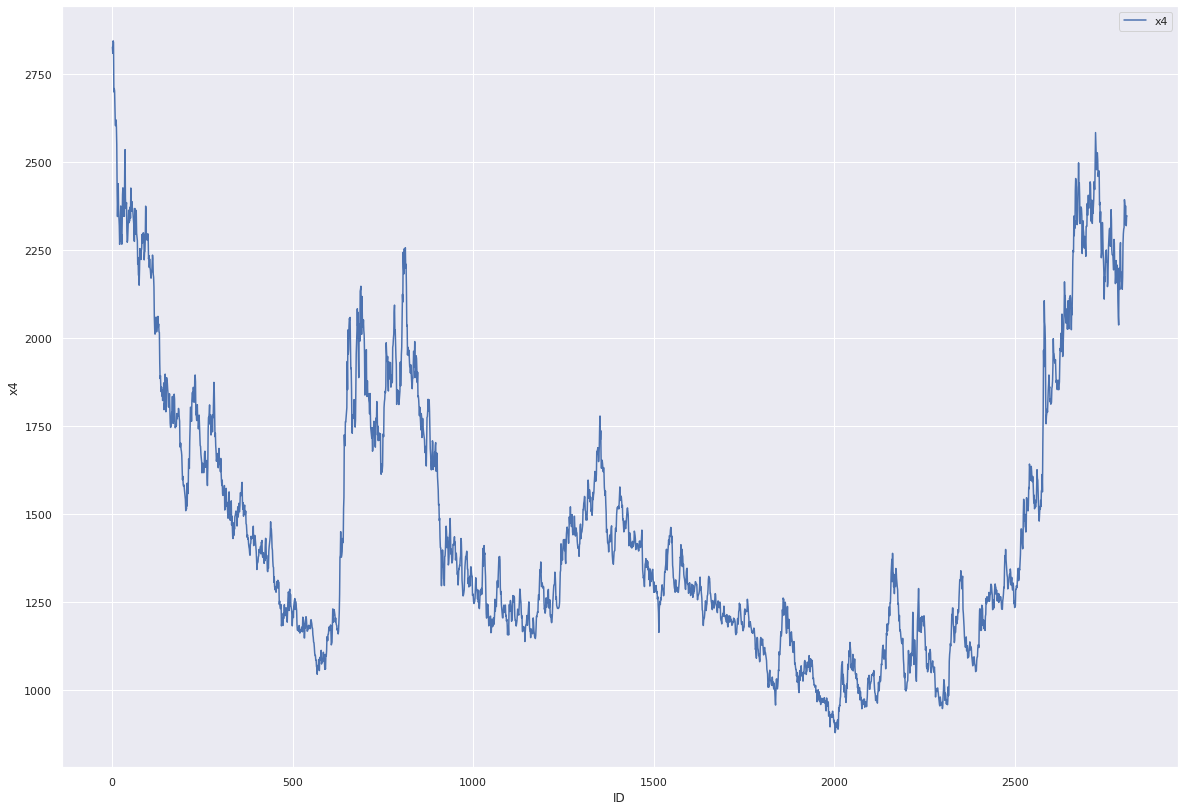

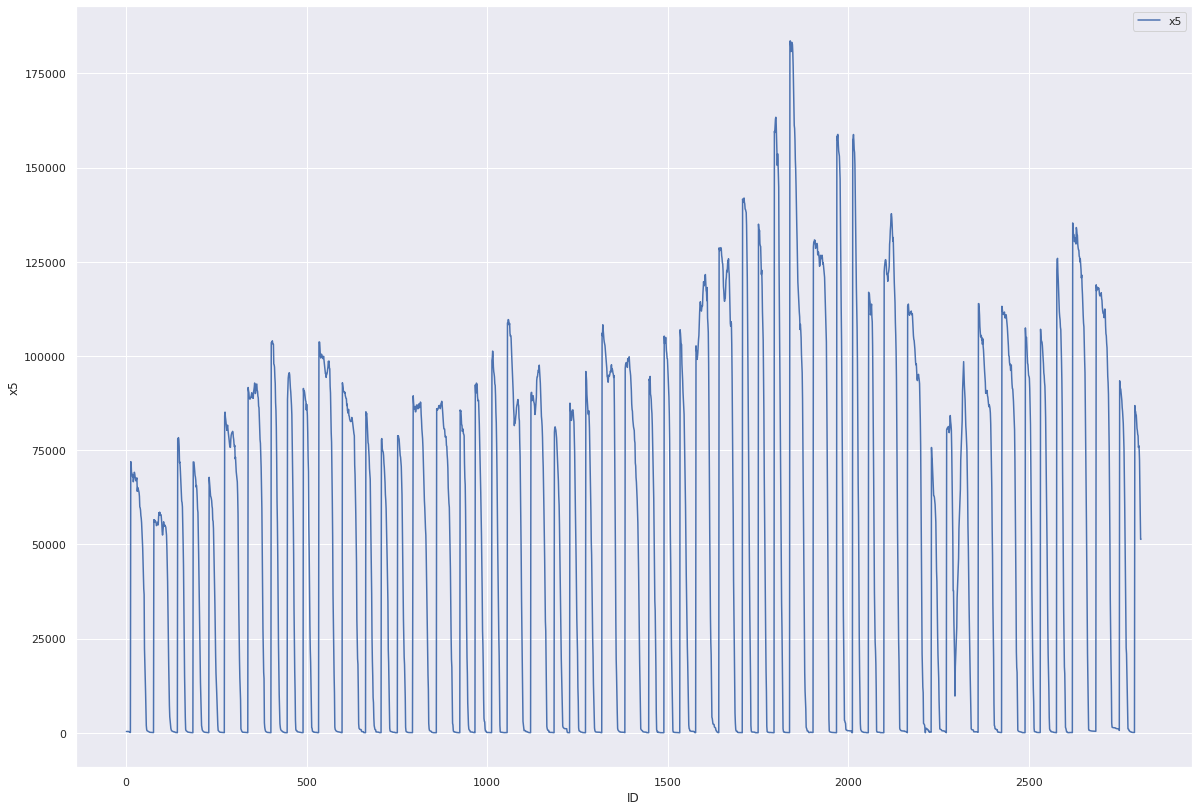

In [ ]:
sns.set(rc={'figure.figsize':(20,14)})
df.plot(x ='ID', y='x1', ylabel='x1')
df.plot(x ='ID', y='x2', ylabel='x2')
df.plot(x ='ID', y='x3', ylabel='x3')
df.plot(x ='ID', y='x4', ylabel='x4')
df.plot(x ='ID', y='x5', ylabel='x5')

#### **Plot chung tất cả các series**

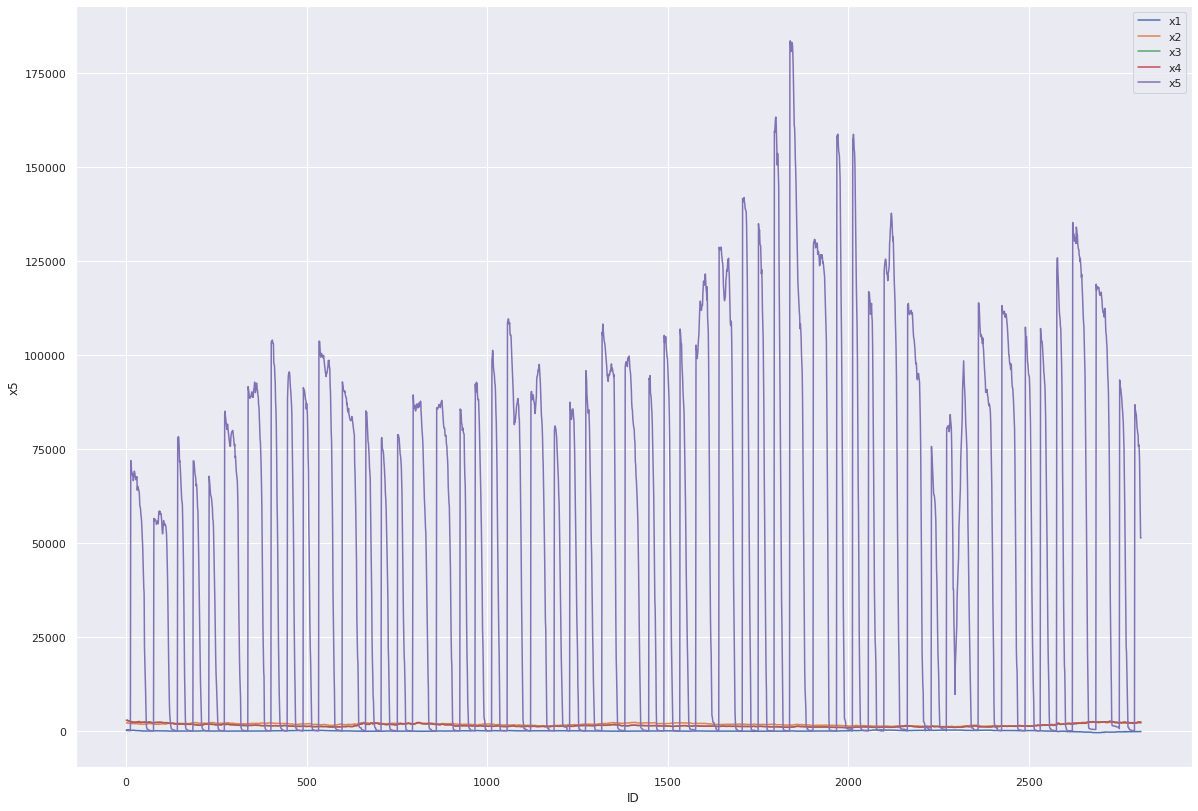

In [ ]:
ax = df.plot(x ='ID', y='x1', ylabel='x1')
df.plot(x ='ID', y='x2', ylabel='x2', ax=ax)
df.plot(x ='ID', y='x3', ylabel='x3', ax=ax)
df.plot(x ='ID', y='x4', ylabel='x4', ax=ax)
df.plot(x ='ID', y='x5', ylabel='x5', ax=ax)

*Có thể thấy giá trị của series x5 lớn hơn rất nhiều so với các series x1, x2, x3, x4* 

#### **Normalization các series**

Normalized sử dụng phương pháp Min Max Scaler 

In [ ]:
normalized_df_x1=(df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
normalized_df_x2=(df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
normalized_df_x3=(df['x3']-df['x3'].min())/(df['x3'].max()-df['x3'].min())
normalized_df_x4=(df['x4']-df['x4'].min())/(df['x4'].max()-df['x4'].min())
normalized_df_x5=(df['x5']-df['x5'].min())/(df['x5'].max()-df['x5'].min())

Tạo một dataframe mới để chứa giá trị của x1, x2, x3, x4, x5 sau khi normalized 

In [ ]:
df_normalized = pd.DataFrame()
df_normalized['x1_normalized'] = pd.Series(normalized_df_x1.values)
df_normalized['x2_normalized'] = pd.Series(normalized_df_x2.values)
df_normalized['x3_normalized'] = pd.Series(normalized_df_x3.values)
df_normalized['x4_normalized'] = pd.Series(normalized_df_x4.values)
df_normalized['x5_normalized'] = pd.Series(normalized_df_x5.values)

In [ ]:
df_normalized

,x1_normalized,x2_normalized,x3_normalized,x4_normalized,x5_normalized
0,0.720607,0.761024,0.991464,0.990967,0.001775
1,0.747155,0.746088,0.982927,0.981934,0.001775
2,0.771176,0.746799,1.000000,1.000000,0.001775
3,0.783818,0.785917,0.997991,0.997964,0.001775
4,0.720607,0.742532,0.926939,0.926209,0.001775
...,...,...,...,...,...
2805,0.353982,0.746088,0.757720,0.761578,0.393506
2806,0.360303,0.729018,0.730605,0.734606,0.359352
2807,0.379267,0.726174,0.729099,0.732824,0.315689
2808,0.372946,0.717639,0.743158,0.747074,0.279575


#### **Plot tất cả các series đã normalized** 

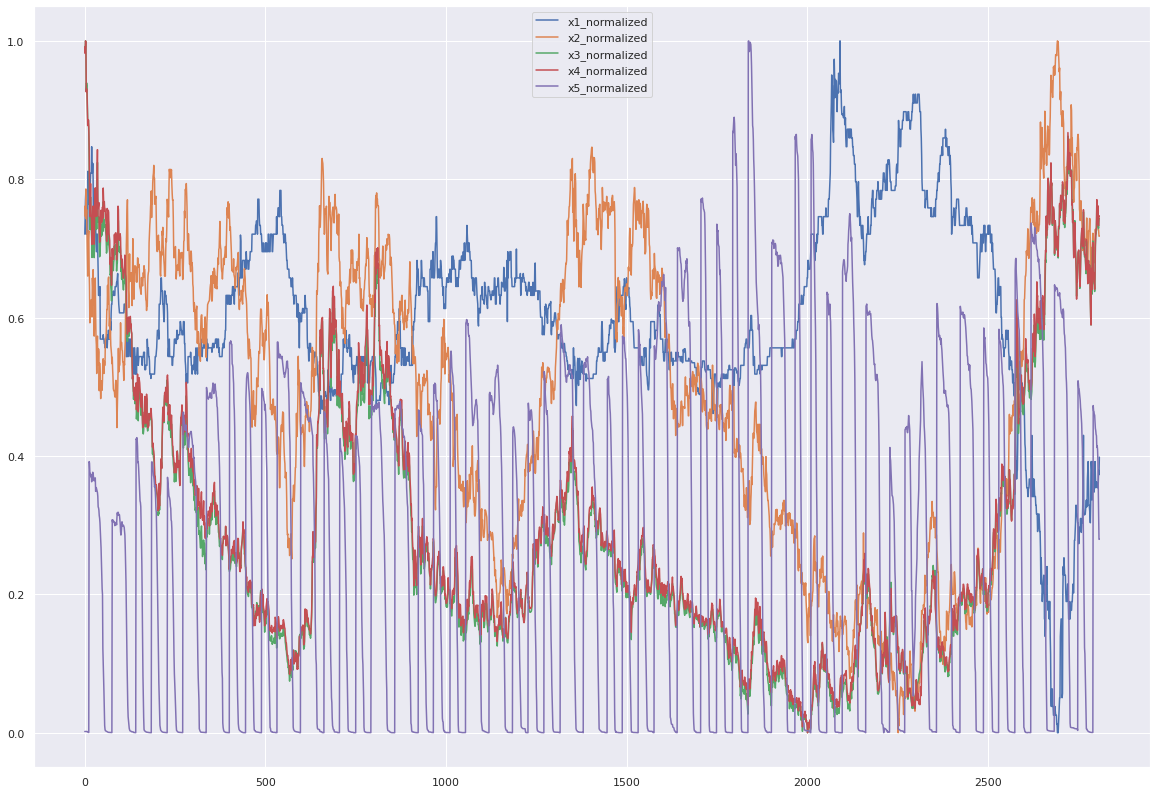

In [ ]:
ax = df_normalized.plot(y='x1_normalized')
df_normalized.plot(y='x2_normalized', ax=ax)
df_normalized.plot(y='x3_normalized', ax=ax)
df_normalized.plot(y='x4_normalized', ax=ax)
df_normalized.plot(y='x5_normalized', ax=ax)

*Các biến đã ở cùng một scale, không chênh lệch về giá trị lớn* 

#### **Plot các cặp series** 

Có tất cả 10 cặp (tổ hợp chập 2 của 5) 
x12, x13, x14, x15, x23, x24, x25, x34, x35, x45 

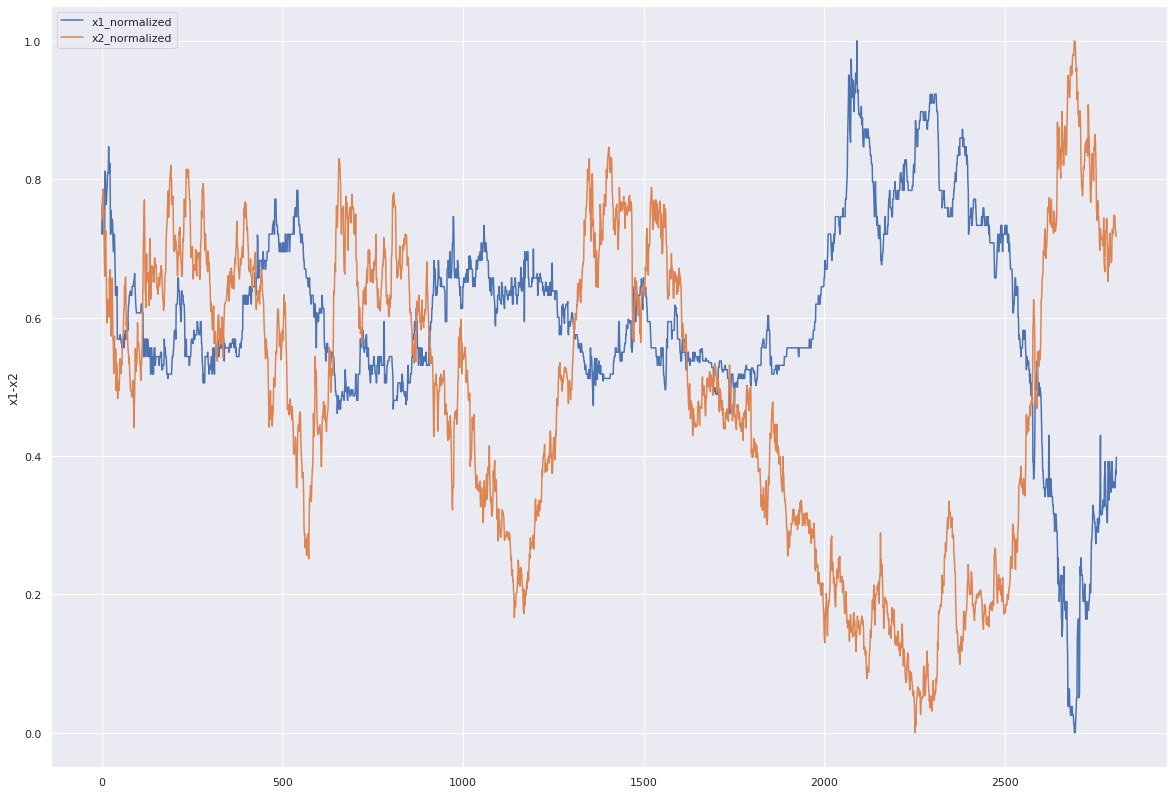

In [ ]:
ax_12 = df_normalized.plot(y='x1_normalized', ylabel='x1-x2')
df_normalized.plot(y='x2_normalized', ax=ax_12)

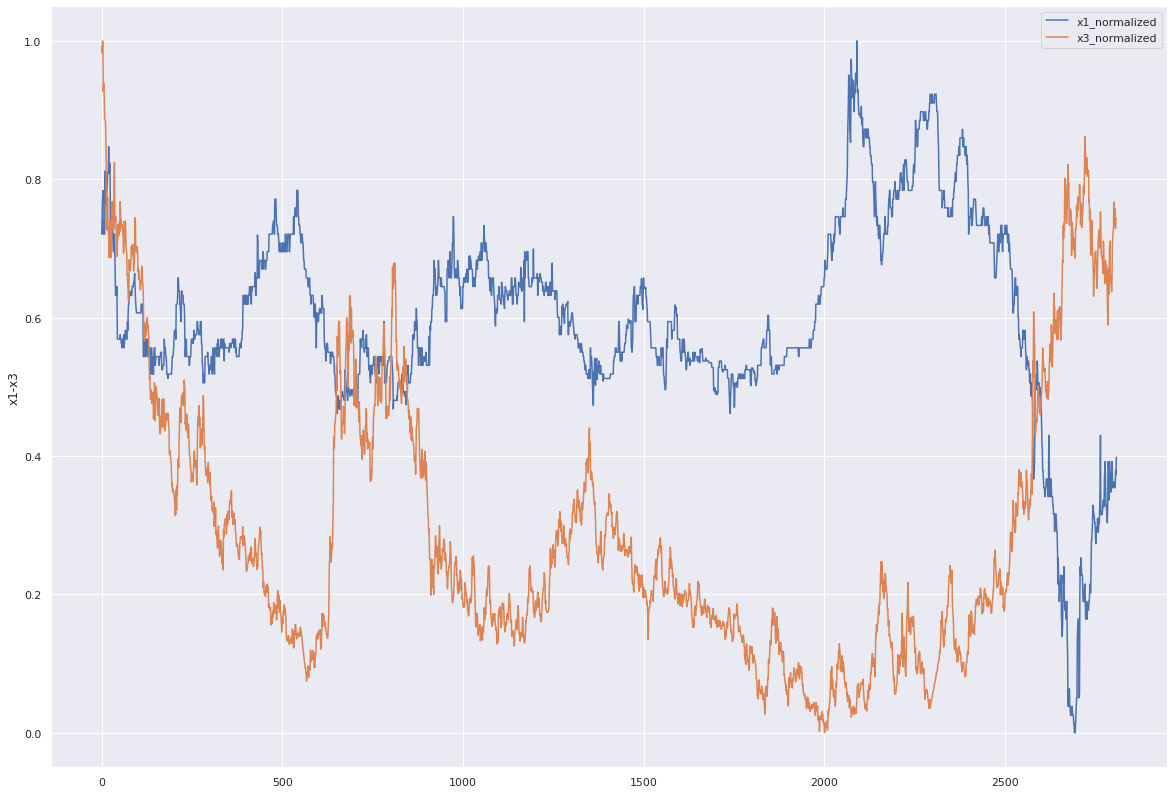

In [ ]:
ax_13 = df_normalized.plot(y='x1_normalized', ylabel='x1-x3')
df_normalized.plot(y='x3_normalized', ax=ax_13)

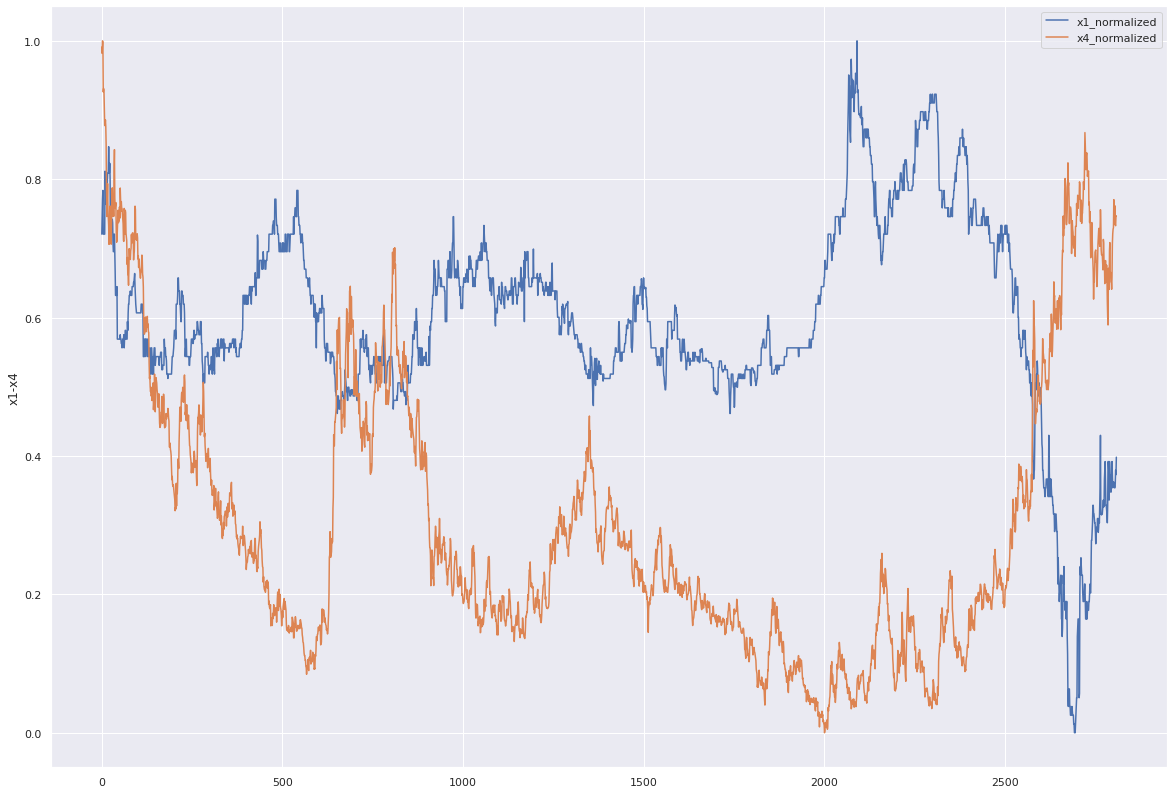

In [ ]:
ax_14 = df_normalized.plot(y='x1_normalized', ylabel='x1-x4')
df_normalized.plot(y='x4_normalized', ax=ax_14)

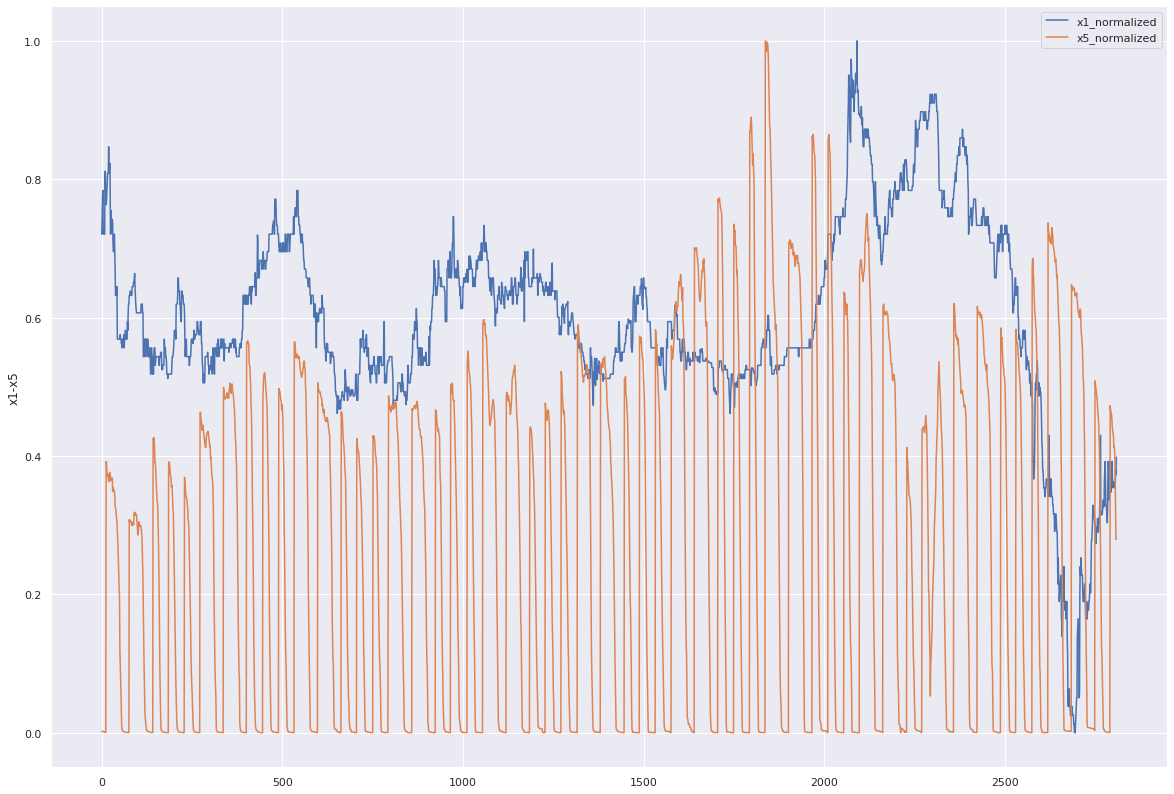

In [ ]:
ax_15 = df_normalized.plot(y='x1_normalized', ylabel='x1-x5')
df_normalized.plot(y='x5_normalized', ax=ax_15)

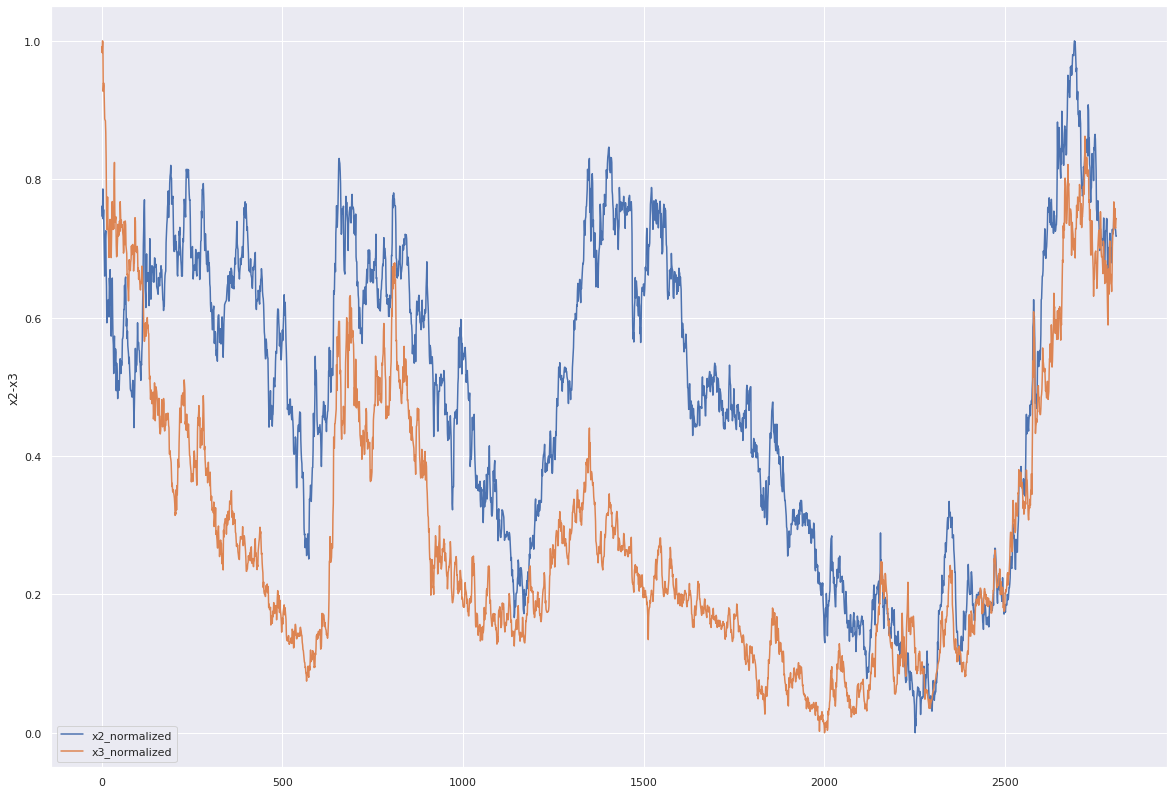

In [ ]:
ax_23 = df_normalized.plot(y='x2_normalized', ylabel='x2-x3')
df_normalized.plot(y='x3_normalized', ax=ax_23)

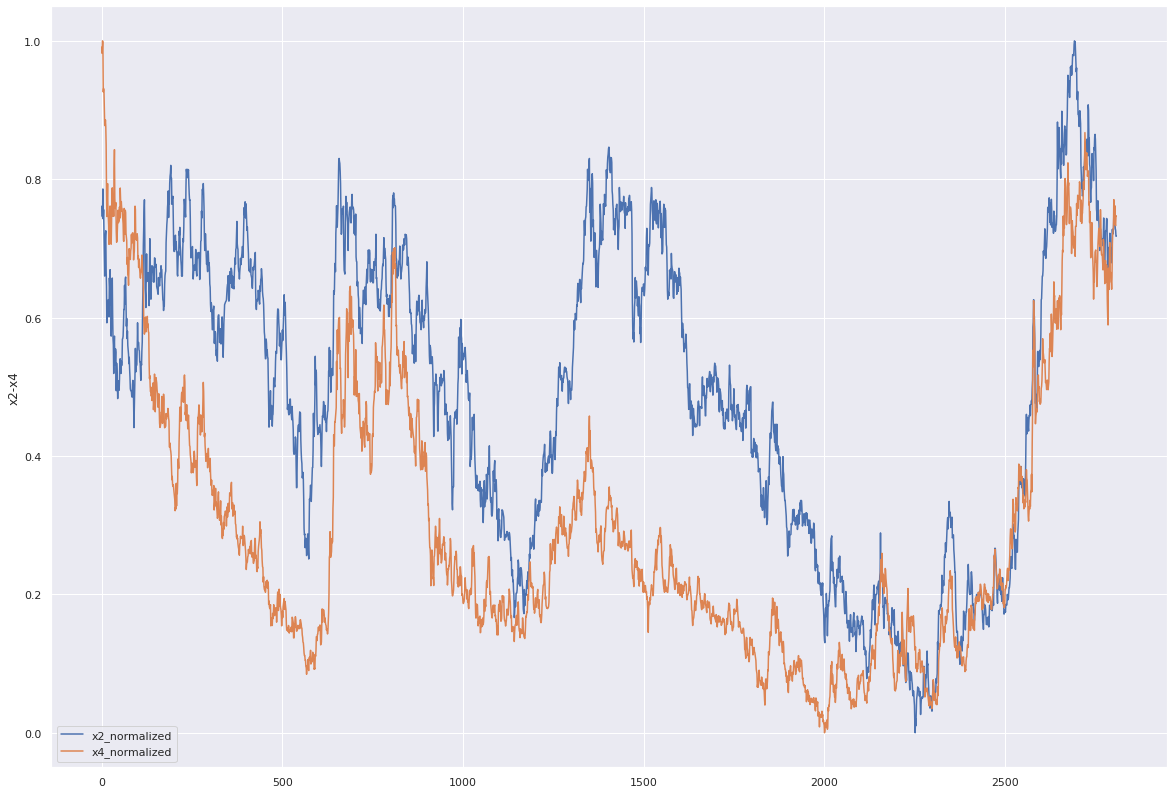

In [ ]:
ax_24 = df_normalized.plot(y='x2_normalized', ylabel='x2-x4')
df_normalized.plot(y='x4_normalized', ax=ax_24)

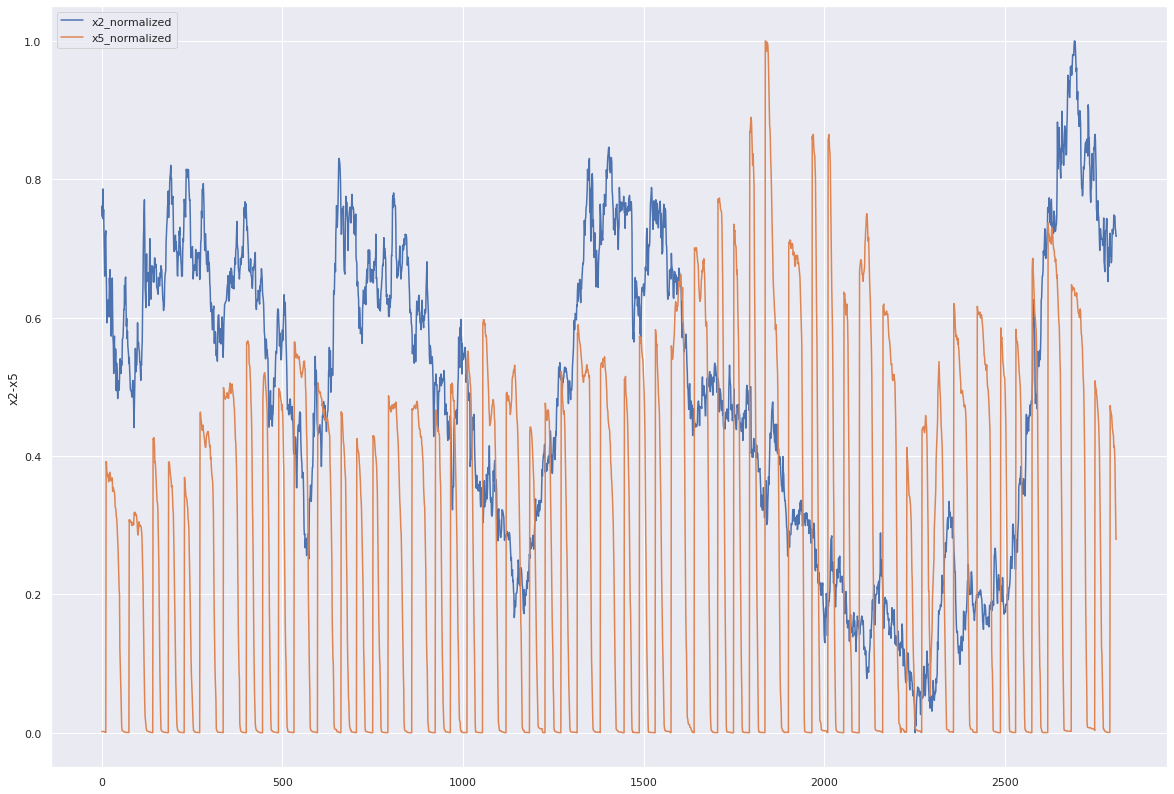

In [ ]:
ax_25 = df_normalized.plot(y='x2_normalized', ylabel='x2-x5')
df_normalized.plot(y='x5_normalized', ax=ax_25)

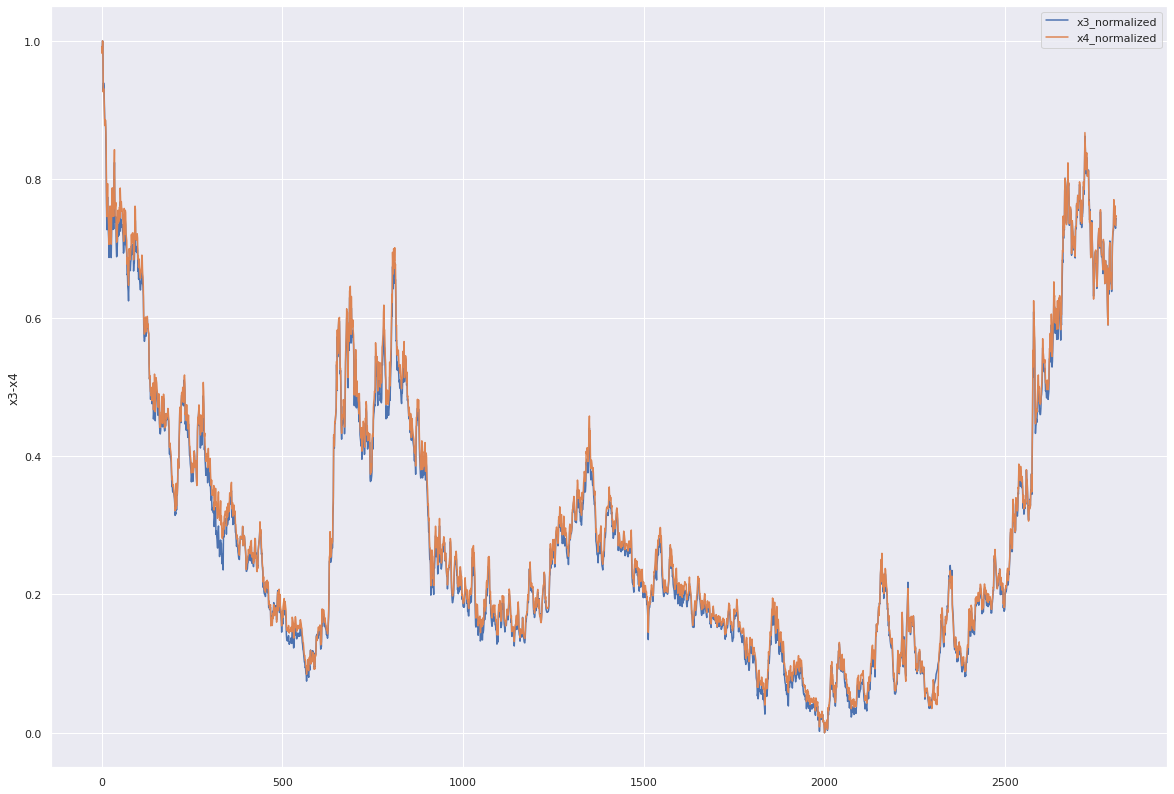

In [ ]:
ax_34 = df_normalized.plot(y='x3_normalized', ylabel='x3-x4')
df_normalized.plot(y='x4_normalized', ax=ax_34)

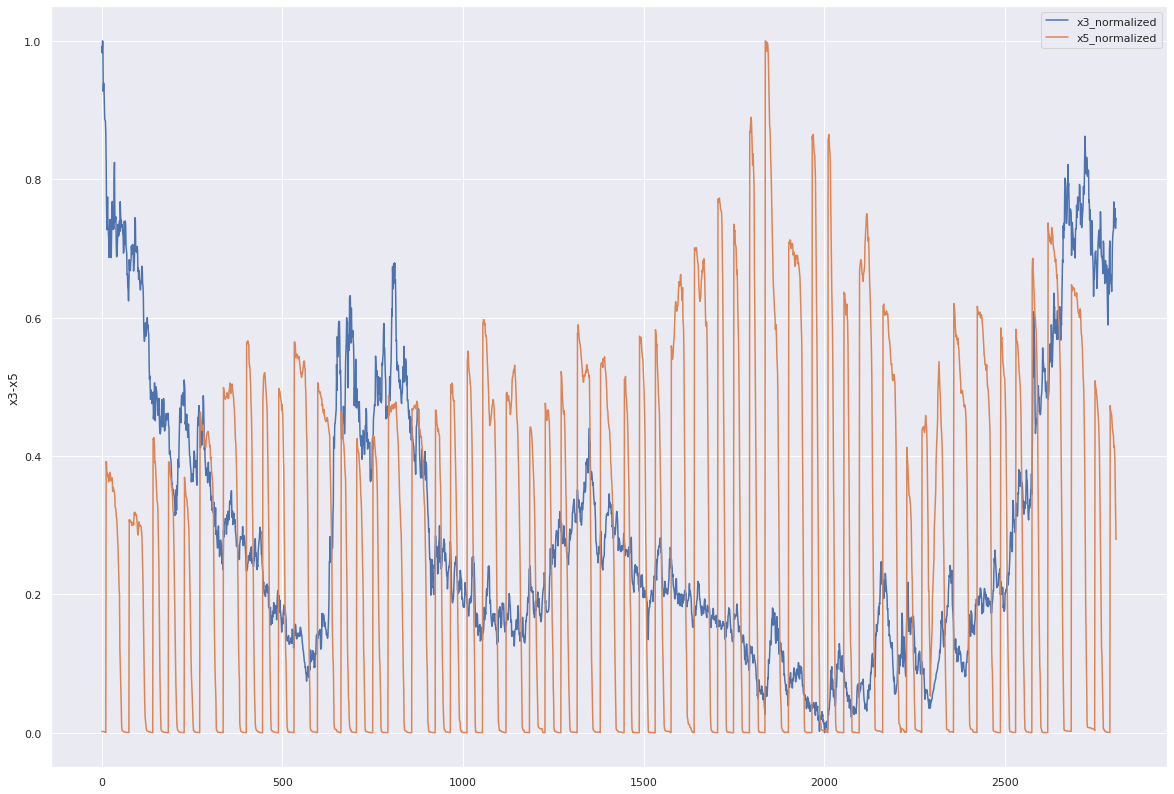

In [ ]:
ax_35 = df_normalized.plot(y='x3_normalized', ylabel='x3-x5')
df_normalized.plot(y='x5_normalized', ax=ax_35)

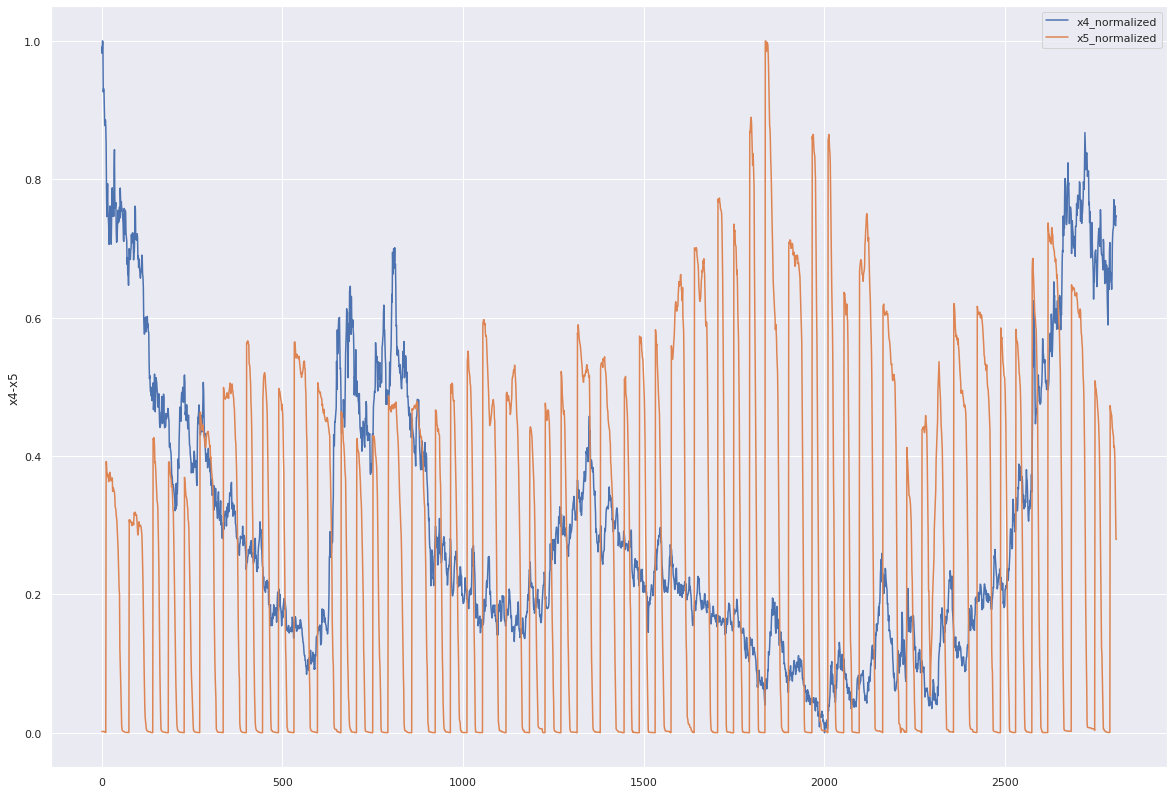

In [ ]:
ax_45 = df_normalized.plot(y='x4_normalized', ylabel='x4-x5')
df_normalized.plot(y='x5_normalized', ax=ax_45)

# **Distance Approach**

Normalize the input data. The main reason for this is that as all of the stocks have different scales of prices, we need to uniform the scales to calculate the Euclidean distance in the pairs selection part. Any normalization method would be applied in this step, but usually, a min-max normalization is used. (Ref: https://hudsonthames.org/distance-approach-in-pairs-trading-part-i/) 

### **Khoảng cách Euclidean** 

In [ ]:
distance_12 = np.linalg.norm(df_normalized['x1_normalized']-df_normalized['x2_normalized'])
distance_13 = np.linalg.norm(df_normalized['x1_normalized']-df_normalized['x3_normalized'])
distance_14 = np.linalg.norm(df_normalized['x1_normalized']-df_normalized['x4_normalized'])
distance_15 = np.linalg.norm(df_normalized['x1_normalized']-df_normalized['x5_normalized'])
distance_23 = np.linalg.norm(df_normalized['x2_normalized']-df_normalized['x3_normalized'])
distance_24 = np.linalg.norm(df_normalized['x2_normalized']-df_normalized['x4_normalized'])
distance_25 = np.linalg.norm(df_normalized['x2_normalized']-df_normalized['x5_normalized'])
distance_34 = np.linalg.norm(df_normalized['x3_normalized']-df_normalized['x4_normalized'])
distance_35 = np.linalg.norm(df_normalized['x3_normalized']-df_normalized['x5_normalized'])
distance_45 = np.linalg.norm(df_normalized['x4_normalized']-df_normalized['x5_normalized'])

In [ ]:
print(f"Euclidean Distance 12: + {distance_12}")
print(f"Euclidean Distance 13: + {distance_13}")
print(f"Euclidean Distance 14: + {distance_14}")
print(f"Euclidean Distance 15: + {distance_15}")
print(f"Euclidean Distance 23: + {distance_23}")
print(f"Euclidean Distance 24: + {distance_24}")
print(f"Euclidean Distance 25: + {distance_25}")
print(f"Euclidean Distance 34: + {distance_34}")
print(f"Euclidean Distance 35: + {distance_35}")
print(f"Euclidean Distance 45: + {distance_45}")

Euclidean Distance 12: + 19.079818042755413
Euclidean Distance 13: + 23.247180624480023
Euclidean Distance 14: + 22.97464972844072
Euclidean Distance 15: + 23.697244623026535
Euclidean Distance 23: + 13.583466443557365
Euclidean Distance 24: + 13.200540773370381
Euclidean Distance 25: + 22.05520127157206
Euclidean Distance 34: + 0.6112742295449528
Euclidean Distance 35: + 18.050970363184653
Euclidean Distance 45: + 18.076440694114794


*Khoảng cách Euclidean của cặp x3-x4 là nhỏ nhất* 

#### **Số lượng Zero-crossings**

The other approach manually constructs an empirical distribution of zero crossings from the data sample. A high rate of zero crossings is used as evidence of mean reversion, although it is not clear how to define the trigger point. (Ref: https://www.researchgate.net/publication/267721035_A_New_Approach_to_Modeling_and_Estimation_for_Pairs_Trading) 

The concept of zero-crossings is very straightforward. Defined as the number of times the normalized spread crosses the value zero, it measures the frequency of divergence and convergence between two securities, the higher the number of zero crossings, the higher chance of getting more pair returns. (Ref: https://hudsonthames.org/distance-approach-in-pairs-trading-part-i/)

#### **Tính spread của các cặp series**

In [ ]:
spread_12 = (df_normalized['x1_normalized']-df_normalized['x2_normalized']).to_numpy()
spread_13 = (df_normalized['x1_normalized']-df_normalized['x3_normalized']).to_numpy()
spread_14 = (df_normalized['x1_normalized']-df_normalized['x4_normalized']).to_numpy()
spread_15 = (df_normalized['x1_normalized']-df_normalized['x5_normalized']).to_numpy()
spread_23 = (df_normalized['x2_normalized']-df_normalized['x3_normalized']).to_numpy()
spread_24 = (df_normalized['x2_normalized']-df_normalized['x4_normalized']).to_numpy()
spread_25 = (df_normalized['x2_normalized']-df_normalized['x5_normalized']).to_numpy()
spread_34 = (df_normalized['x3_normalized']-df_normalized['x4_normalized']).to_numpy()
spread_35 = (df_normalized['x3_normalized']-df_normalized['x5_normalized']).to_numpy()
spread_45 = (df_normalized['x4_normalized']-df_normalized['x5_normalized']).to_numpy()



```
# Định dạng của đoạn này là mã
```

#### **Tính số lần zero crossings**

In [ ]:
zero_crossings_12 = ((spread_12[:-1] * spread_12[1:]) < 0).sum()
zero_crossings_13 = ((spread_13[:-1] * spread_13[1:]) < 0).sum()
zero_crossings_14 = ((spread_14[:-1] * spread_14[1:]) < 0).sum()
zero_crossings_15 = ((spread_15[:-1] * spread_15[1:]) < 0).sum()
zero_crossings_23 = ((spread_23[:-1] * spread_23[1:]) < 0).sum()
zero_crossings_24 = ((spread_24[:-1] * spread_24[1:]) < 0).sum()
zero_crossings_25 = ((spread_25[:-1] * spread_24[1:]) < 0).sum()
zero_crossings_34 = ((spread_34[:-1] * spread_34[1:]) < 0).sum()
zero_crossings_35 = ((spread_35[:-1] * spread_35[1:]) < 0).sum()
zero_crossings_45 = ((spread_45[:-1] * spread_45[1:]) < 0).sum()

In [ ]:
print(f"Zero crossings of 12: + {zero_crossings_12}")
print(f"Zero crossings of 13: + {zero_crossings_13}")
print(f"Zero crossings of 14: + {zero_crossings_14}")
print(f"Zero crossings of 15: + {zero_crossings_15}")
print(f"Zero crossings of 23: + {zero_crossings_23}")
print(f"Zero crossings of 24: + {zero_crossings_24}")
print(f"Zero crossings of 25: + {zero_crossings_25}")
print(f"Zero crossings of 34: + {zero_crossings_34}")
print(f"Zero crossings of 35: + {zero_crossings_35}")
print(f"Zero crossings of 45: + {zero_crossings_45}")

Zero crossings of 12: + 50
Zero crossings of 13: + 34
Zero crossings of 14: + 30
Zero crossings of 15: + 38
Zero crossings of 23: + 52
Zero crossings of 24: + 50
Zero crossings of 25: + 795
Zero crossings of 34: + 93
Zero crossings of 35: + 98
Zero crossings of 45: + 100


*Cặp x2-x5 có số lần zero-crossings lớn nhất* 

# **Cointegration Approach**

**Order of Integration I(d)**: d chỉ số lần cần phải differencing để time series được stationary

Phương pháp Engle Granger chỉ ứng dụng cho các time series có cùng bậc I(d), thường là I(1)

Nếu giữa các time series có bậc khác nhau ví dụ giữa I(0) và I(1) -> sử dụng phương pháp ARDL 

#### **Tìm order of integration của các series x1, x2, x3, x4, x5** 

In [ ]:
#Ho: It is have unit root, non-stationary
#H1: It is stationary

def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['x1'])

ADF Test Statistic : -1.9398330545928952
p-value : 0.31356052230843784
#Lags Used : 5
Number of Observations Used : 2804
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df['x2'])

ADF Test Statistic : -2.3452472215982825
p-value : 0.15778964905525678
#Lags Used : 1
Number of Observations Used : 2808
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df['x3'])

ADF Test Statistic : -2.559599477027209
p-value : 0.10163797695500298
#Lags Used : 8
Number of Observations Used : 2801
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df['x4'])

ADF Test Statistic : -2.4915198851530644
p-value : 0.11755128593191666
#Lags Used : 8
Number of Observations Used : 2801
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df['x5'])

ADF Test Statistic : -14.138777094865922
p-value : 2.2653690700384835e-26
#Lags Used : 20
Number of Observations Used : 2789
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


x1, x2, x3, x4 có unit root 

x5 ~ I(0)

#### **Phân tích order of integration của x1, x2, x3, x4**

In [ ]:
adfuller_test(df['x1'].diff().dropna())

ADF Test Statistic : -27.030373015644216
p-value : 0.0
#Lags Used : 4
Number of Observations Used : 2804
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df['x2'].diff().dropna())

ADF Test Statistic : -37.24179624499743
p-value : 0.0
#Lags Used : 1
Number of Observations Used : 2807
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df['x3'].diff().dropna())

ADF Test Statistic : -18.875708267338347
p-value : 0.0
#Lags Used : 7
Number of Observations Used : 2801
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df['x4'].diff().dropna())

ADF Test Statistic : -18.789760877534807
p-value : 2.02355398296255e-30
#Lags Used : 7
Number of Observations Used : 2801
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


x1, x2, x3, x4 ~ I(1) 

#### **Engle Granger test cho x1, x2, x3, x4**

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
tickers= ['x1','x2','x3','x4']

[('x1', 'x2'), ('x1', 'x3'), ('x1', 'x4'), ('x3', 'x4')]


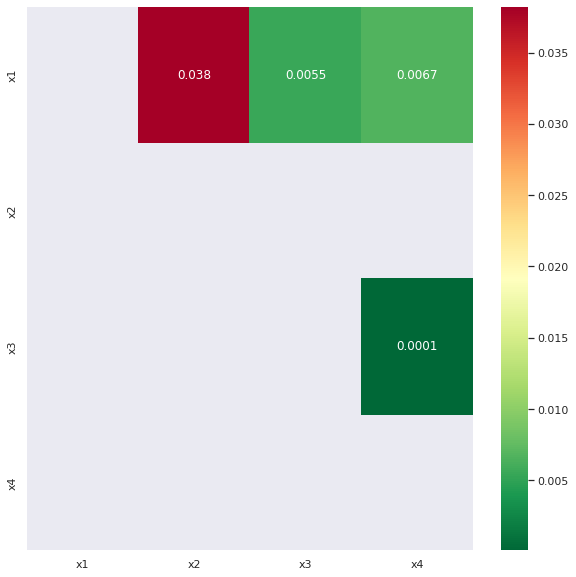

In [ ]:
scores, pvalues, pairs = find_cointegrated_pairs(df[['x1','x2','x3','x4']])
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05), annot=True
                )
print(pairs)

#### **ARDL test cho x5**